<h1>Análisis exploratorio</h1>

<h3>Objetivo del análisis</h3>

El objetivo de este análisis exploratorio es comprender los factores sociodemográficos y contextuales asociados a los distintos tipos de delitos personales sufridos por las víctimas (variable 'newoff'), utilizando datos de la encuesta de *Victimización Personal (Personal Victimization Dataset)*.

Este análisis servirá como base para entrenar modelos de Machine Learning capaces de predecir el tipo de crimen que una persona podría sufrir en función de sus características, como la edad ('ager'), sexo ('sex'), origen étnico ('race_ethnicity'), nivel de ingresos ('hincome1'), nivel educativo ('educatn1'), estado civil ('marital') o el entorno donde reside ('region', 'msa', 'popsize', 'locationr').

<h3>Importancia del análisis</h3>

Comprender estos patrones es clave porque permite detectar perfiles o contextos más vulnerables a ciertos tipos de delitos.

<h3>Tipo de problema</h3>

Se trata de un problema de clasificación multiclase.


In [114]:
#Importación de librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
#Cargar csv de crímenes personales
personal_Victimization_Original = pd.read_csv("../../data/personal_victimization_Original.csv")
print("Tamaño del dataset:", personal_Victimization_Original.shape)

Tamaño del dataset: (68852, 37)


<h3>Análisis general del dataset</h3>

In [116]:
# Dataset completo antes del procesamiento
personal_Victimization_Original

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,...,weapcat,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt
0,150102759544999999999913501,1993.1,1993,6,2,2,1,1,4,-1,...,5.0,0,1,0.0,3,1,-1,8442.414110,1,8442.414110
1,150123750403999999999911602,1993.1,1993,4,2,2,1,1,4,-1,...,0.0,0,1,0.0,1,1,-1,5158.885110,1,5158.885110
2,150166998771999999999913502,1993.1,1993,3,2,2,2,2,2,-1,...,0.0,1,3,1.0,2,1,-1,3006.106210,1,3006.106210
3,150283624848999999999931601,1993.1,1993,2,1,2,1,1,6,-1,...,0.0,0,1,0.0,3,1,-1,4533.877240,1,4533.877240
4,150283624848999999999931601,1993.1,1993,2,1,2,1,1,6,-1,...,0.0,0,1,0.0,3,1,-1,4533.877240,1,4533.877240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68847,237539391552393556449226701,2024.4,2024,5,2,2,2,2,5,2,...,0.0,1,3,2.0,4,1,2,3160.713834,1,3160.713834
68848,237539391552393556449226701,2024.4,2024,5,2,2,2,2,5,2,...,0.0,1,3,2.0,4,1,2,3160.713834,1,3160.713834
68849,238111680302502456385814101,2024.4,2024,6,1,2,1,1,7,4,...,0.0,0,1,0.0,98,4,7,3274.183681,1,3274.183681
68850,238114411552144656448414701,2024.4,2024,5,1,2,1,1,2,1,...,0.0,0,1,0.0,98,1,2,7486.293953,1,7486.293953


In [117]:
# Información general del dataset
personal_Victimization_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68852 entries, 0 to 68851
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idper           68852 non-null  object 
 1   yearq           68852 non-null  float64
 2   year            68852 non-null  int64  
 3   ager            68852 non-null  int64  
 4   sex             68852 non-null  int64  
 5   hispanic        68852 non-null  int64  
 6   race            68852 non-null  int64  
 7   race_ethnicity  68852 non-null  int64  
 8   hincome1        68852 non-null  int64  
 9   hincome2        68852 non-null  int64  
 10  marital         68852 non-null  int64  
 11  popsize         68852 non-null  int64  
 12  region          68852 non-null  int64  
 13  msa             68852 non-null  int64  
 14  locality        68852 non-null  int64  
 15  educatn1        68852 non-null  int64  
 16  educatn2        68852 non-null  int64  
 17  veteran         68852 non-null 

In [118]:
# Analisis de valores nulos 
personal_Victimization_Original.isnull().sum()

idper             0
yearq             0
year              0
ager              0
sex               0
hispanic          0
race              0
race_ethnicity    0
hincome1          0
hincome2          0
marital           0
popsize           0
region            0
msa               0
locality          0
educatn1          0
educatn2          0
veteran           0
citizen           0
newcrime          0
newoff            0
seriousviolent    0
notify            0
vicservices       0
locationr         0
direl             0
weapon            0
weapcat           2
injury            0
serious           0
treatment         4
offenderage       0
offendersex       0
offtracenew       0
wgtviccy          0
series            0
newwgt            0
dtype: int64

No se han encontrado valores nulos en nuestro dataset.

<h3>Análisis de cada feature</h3>

- idper: Identificador único de la persona.

- yearq: Año y trimestre en que se recolectaron los datos.

- year: Año de recolección.

- ager: Grupo de edad del encuestado.

- sex: Sexo del encuestado.

- hispanic: Origen hispano del encuestado.

- race: Raza del encuestado.

- race_ethnicity: Combinación de raza y origen hispano.

- hincome1: Nivel de ingreso total del hogar (categorías básicas).

- hincome2: Nivel de ingreso imputado (a partir de 2017).

- marital: Estado civil.

- popsize: Tamaño de la población del lugar donde vive.

- region: Región de residencia (Noreste, Medio Oeste, Sur, Oeste).

- msa: Clasificación del área metropolitana (ciudad principal, fuera de ciudad, fuera de MSA).

- locality: Tipo de localidad (urbana, suburbana, rural).

- educatn1: Nivel educativo (categoría básica).

- educatn2: Nivel educativo (detallado, desde 2003).

- veteran: Estatus de veterano (desde 2017).

- citizen: Estatus de ciudadanía (desde 2017).

- newcrime: Tipo general de crimen (violento o robo personal).

- newoff: Tipo específico de crimen (violación, robo, agresión, hurto).

- seriousviolent: Clasificación de violencia (violento grave, simple, hurto).

- notify: Si el crimen fue reportado a la policía.

- vicservices: Si la víctima recibió servicios o asistencia.

- locationr: Lugar donde ocurrió el crimen.

- direl: Relación entre víctima y agresor.

- weapon: Presencia de arma durante el crimen.

- weapcat: Tipo de arma involucrada.

- injury: Si la víctima resultó herida.

- serious: Tipo de lesión sufrida.

- treatment: Si recibió tratamiento médico.

- offenderage: Edad del agresor.

- offendersex: Sexo del agresor.

- offtracenew: Raza/origen étnico del agresor (desde 2012).

- series: Si el incidente pertenece a una serie de crímenes.

- wgtviccy: Peso anual de victimización.

- newwgt: Peso ajustado para crímenes en serie.

Analizando las columnas podemos dividir los datos en tres conjuntos:
- Datos personales y sociodemográficos : Características de la víctima
- Datos geográficos y del entorno : Características del lugar donde reside el encuestado
- Datos del crimen : Información sobre el hecho delictivo y sus circunstancias

<h3>Limpieza de columnas</h3>

Una vez claro el significado de cada variable comenzamos a analizar la correlación entre las variables para entender mejor nuestros datos y comenzar a eliminar las variables que son redundantes y no aportan información relevante.

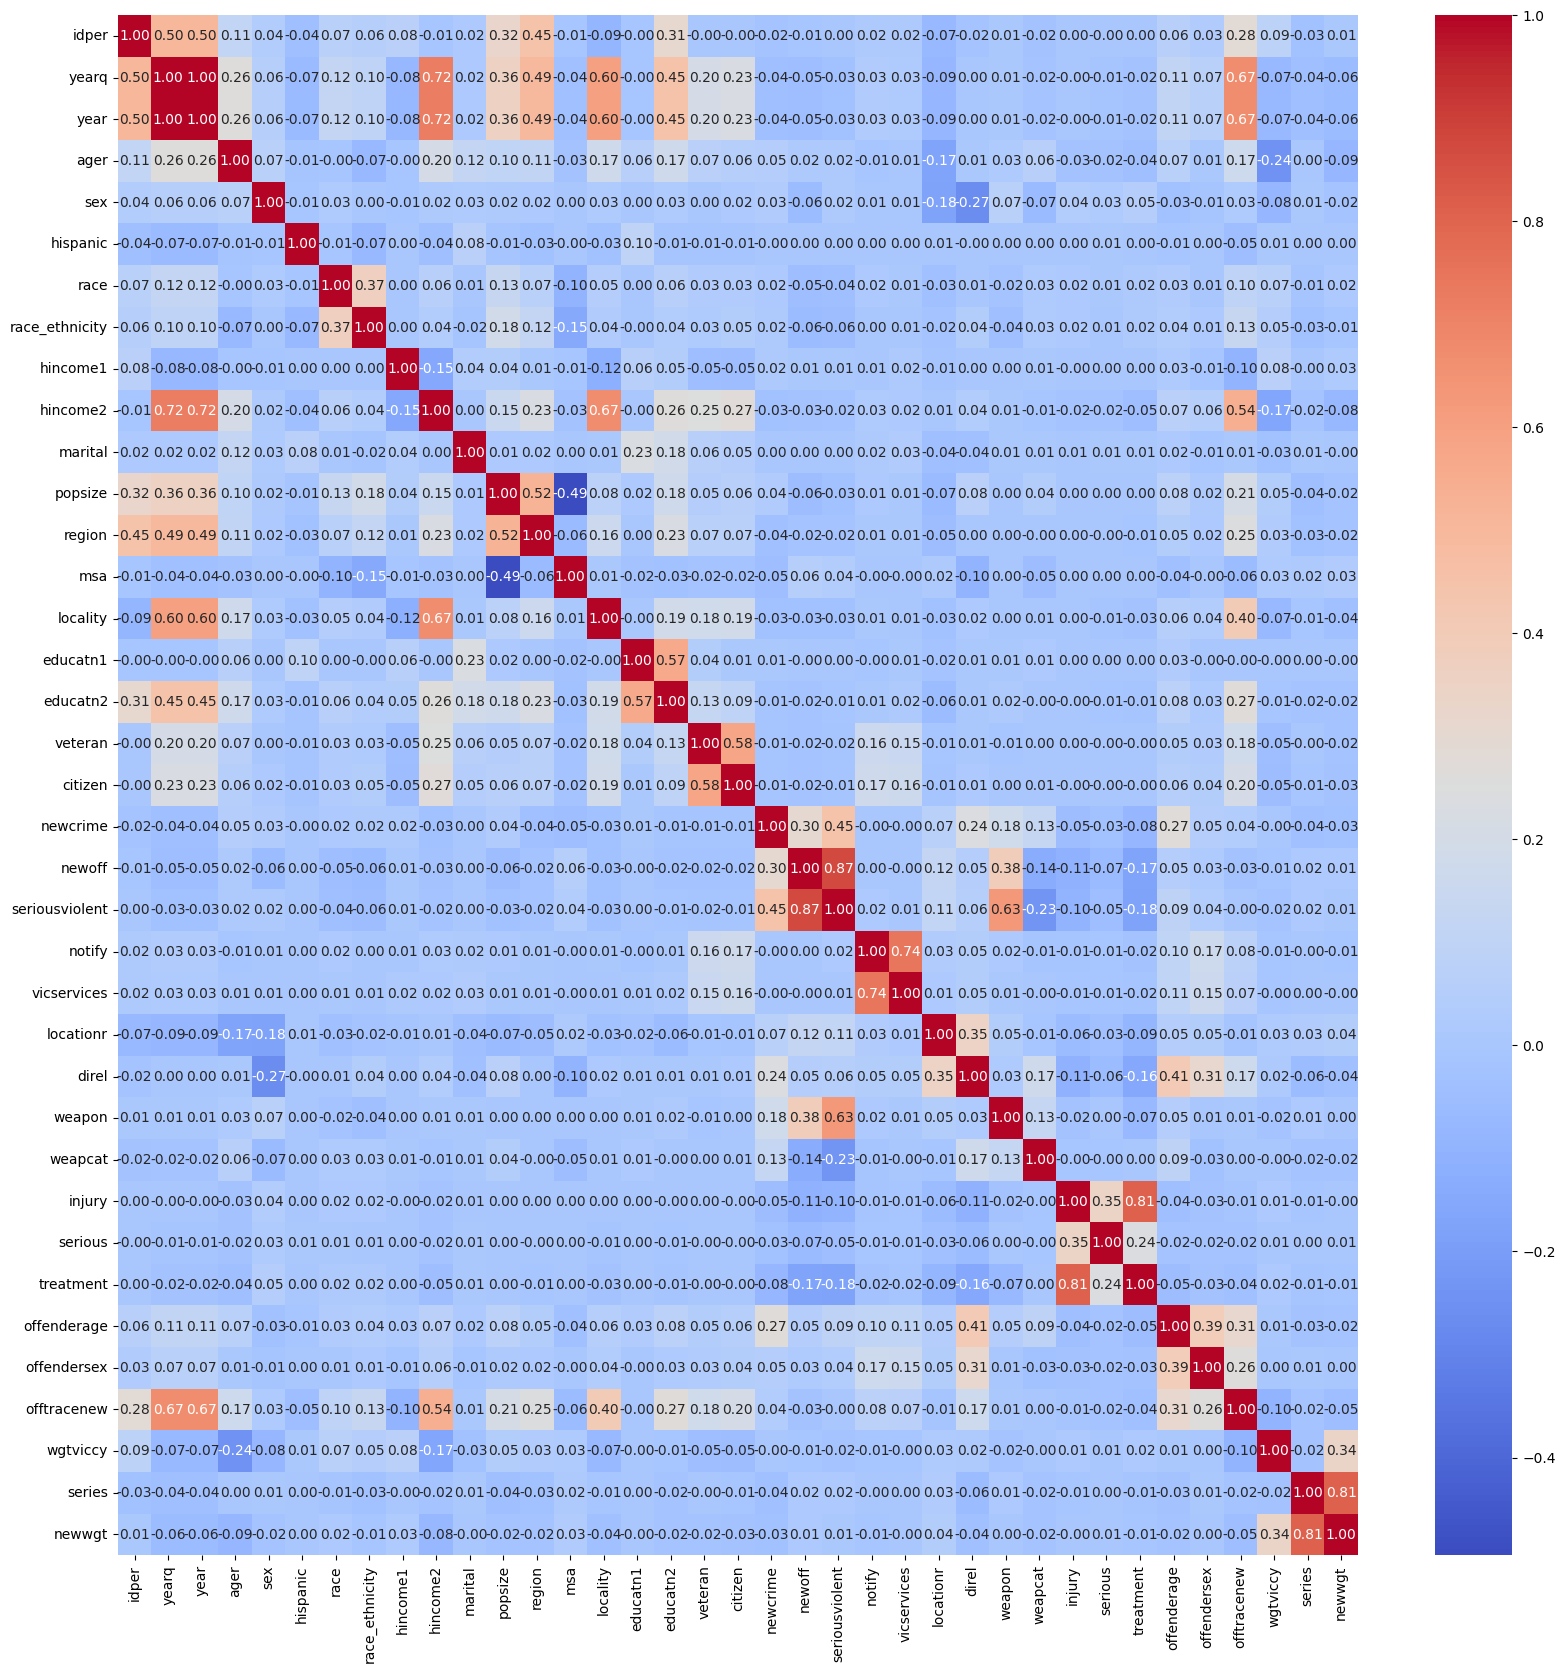

In [119]:
# Mapa de correlacion entre las variables.
personal_Victimization_Original.corr()
plt.figure(figsize=(20,20))
sns.heatmap(personal_Victimization_Original.corr(), annot=True, fmt=".2f",cmap='coolwarm')
plt.show()


Concluimos que para evitar data leakage vamos a eliminar las columnas que pertenecen al conjunto de datos de'Datos del crimen' las cuales son:

- newcrime → Tipo agregado de crimen (violento o robo personal)
- newoff → Tipo específico de crimen (violación, robo, agresión, hurto)
- seriousviolent → Clasificación del crimen violento
- notify → Si se reportó a la policía
- vicservices → Si recibió servicios o asistencia
- locationr → Lugar donde ocurrió el crimen
- direl → Relación víctima–ofensor
- weapon → Presencia de arma
- weapcat → Tipo de arma
- injury → Si resultó herido/a
- serious → Tipo de lesión
- treatment → Si recibió atención médica
- offenderage → Edad del agresor
- offendersex → Sexo del agresor
- offtracenew → Raza/origen étnico del agresor
- series → Si fue parte de una serie de delitos
- wgtviccy → Peso anual de victimización
- newwgt → Peso ajustado (para series de crímenes)

In [120]:
# Eliminamos las columnas relacionadas con el delito y con el agresor
personal_Victimization_Original = personal_Victimization_Original.drop(columns=['newcrime','seriousviolent','notify','vicservices','direl','weapon','weapcat','injury','serious','treatment','offenderage','offendersex','offtracenew','series','wgtviccy','newwgt'])

Vamos a eliminar la columna 'idper' ya que esta es solo un id que tienen los datos para identificar a cada persona y no aporta valor a la hora de predecir.

In [121]:
# Eliminamos el id de la persona encuestada
personal_Victimization_Original = personal_Victimization_Original.drop(columns=['idper'])

Eliminamos los datos de años del año 1993 a 1995 ya que nuestra muestra de datos va a ser a partir del año 1996 al 2024. Hemos tomado esta decisión porque hemos detectado que del año 1993 al 1996 muchas columnas no estaban informadas y no tenemos los datos necesarios para imputar, y teniendo en cuenta la cantidad de datos que exiten entre los años 1996-2024 creemos que son suficientes para poder predecir con mejor calidad y valores reales.

In [122]:
# Filtrar los datos para que solo queden entre 1996 y 2024
personal_Victimization_Original = personal_Victimization_Original[
    (personal_Victimization_Original['year'] >= 1996) & 
    (personal_Victimization_Original['year'] <= 2024)
]

Vamos a eliminar las columnas 'year' y 'yearq' ya que estas no indican el año en el que ocurrio el crimen sino el año en el que se recolectaron los datos por lo que no aportan datos relevantes a la hora de predecir el tipo de crimen.

In [123]:
personal_Victimization_Original = personal_Victimization_Original.drop(columns=['yearq'])

In [124]:
personal_Victimization_Original = personal_Victimization_Original.drop(columns=['year'])

Ahora vamos a eliminar las columnas 'hispanic' y 'race' ya que la informacion que está en la columna 'race_ethnicity' es una combinacion de las dos anteriores.

In [125]:
personal_Victimization_Original = personal_Victimization_Original.drop(columns=['hispanic','race'])

Vamos a eliminar la columna 'hincome2' ya que contiene los mismos valores que 'hincome1' pero solo a partir del año 2017.

In [126]:
personal_Victimization_Original = personal_Victimization_Original.drop(columns=['hincome2'])

Vamos a eliminar 'educatn2' ya que 'educatn1' contiene la misma informacion resumida pero abarca todos los años de nuestro dt mientras que educatn2 solo contiene informacion a partir del año 2003

In [127]:
personal_Victimization_Original = personal_Victimization_Original.drop(columns=['educatn2'])

Vamos a eliminar la columna 'locality' ya que solo cuenta con datos a partir del año 2020 y tenemos otras variables como 'popsize', 'region' y 'msa' que nos brindan informacion sobre datos geograficos por lo que dejarla puede ser redundante. 

In [128]:
personal_Victimization_Original = personal_Victimization_Original.drop(columns=['locality'])

Una vez eliminadas las columnas redundantes comprobamos cuales son las variables con las que vamos a trabajar.

In [129]:
# Comprobamos cuales son las columnas restantes
personal_Victimization_Original.columns

Index(['ager', 'sex', 'race_ethnicity', 'hincome1', 'marital', 'popsize',
       'region', 'msa', 'educatn1', 'veteran', 'citizen', 'newoff',
       'locationr'],
      dtype='object')

In [130]:
# Visualizamos los datos con los que vamos a trabajar
personal_Victimization_Original

,ager,sex,race_ethnicity,hincome1,marital,popsize,region,msa,educatn1,veteran,citizen,newoff,locationr
12974,2,2,2,5,2,5,2,1,4,-2,-1,3,1
12975,4,1,6,7,2,1,4,2,5,-2,-1,4,5
12976,1,1,1,5,1,4,4,1,3,-2,-1,4,2
12977,1,1,1,98,1,0,4,3,4,-2,-1,4,2
12978,1,1,1,6,1,1,4,2,3,-2,-1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68847,5,2,2,5,5,1,3,2,4,0,1,4,1
68848,5,2,2,5,5,1,3,2,4,0,1,4,1
68849,6,1,1,7,2,4,4,1,4,1,1,4,1
68850,5,1,1,2,1,1,4,2,4,0,1,4,3


<h3>Mapeo de datos</h3>

Con este pequeño análisis nos dimos cuenta que nuestro dataframe viene mapeado de tal manera que nos dificulta poder analizar apropiadamente, ademas de que preferimos hacer nosotros segun consideremos mas adelante la adecuada transformacion de los datos, ya sea con One-hot-enconding o con label-encoding.

Por esto decidimos mapear los datos segun nos indicaba la pagina de donde obtuvimos los datos, con ayuda del code_book.

In [131]:
#Mapeamos las variables categóricas

# AGE
personal_Victimization_Original['ager'] = personal_Victimization_Original['ager'].map({
    1: '12-17', 2: '18-24', 3: '25-34', 4: '35-49', 5: '50-64', 6: '65+'
})

# SEX
personal_Victimization_Original['sex'] = personal_Victimization_Original['sex'].map({1: 'Male', 2: 'Female'})

# RACE/ETHNICITY
personal_Victimization_Original['race_ethnicity'] = personal_Victimization_Original['race_ethnicity'].map({
    1: 'Non-Hispanic white',
    2: 'Non-Hispanic black',
    3: 'Non-Hispanic American Indian/Alaska Native',
    4: 'Non-Hispanic Asian/Native Hawaiian/Other Pacific Islander',
    5: 'Non-Hispanic more than one race',
    6: 'Hispanic'
})

# HOUSEHOLD INCOME
personal_Victimization_Original['hincome1'] = personal_Victimization_Original['hincome1'].map({
    1: 'Less than $7,500',
    2: '$7,500 to $14,999',
    3: '$15,000 to $24,999',
    4: '$25,000 to $34,999',
    5: '$35,000 to $49,999',
    6: '$50,000 to $74,999',
    7: '$75,000 or more',
    98: 'Residue'
})

# MARITAL STATUS
personal_Victimization_Original['marital'] = personal_Victimization_Original['marital'].map({
    1: 'Never married',
    2: 'Married',
    3: 'Widowed',
    4: 'Divorced',
    5: 'Separated',
    98: 'Residue'
})

# POPULATION SIZE
personal_Victimization_Original['popsize'] = personal_Victimization_Original['popsize'].map({
    0: 'Not a place',
    1: 'Under 100,000',
    2: '100,000–249,999',
    3: '250,000–499,999',
    4: '500,000–999,999',
    5: '1 million or more'
})

# REGION
personal_Victimization_Original['region'] = personal_Victimization_Original['region'].map({
    1: 'Northeast',
    2: 'Midwest',
    3: 'South',
    4: 'West'
})

# LOCATION / MSA
personal_Victimization_Original['msa'] = personal_Victimization_Original['msa'].map({
    1: 'Principal city within MSA',
    2: 'Not part of principal city within MSA',
    3: 'Outside MSA'
})

# EDUCATION LEVEL (older version)
personal_Victimization_Original['educatn1'] = personal_Victimization_Original['educatn1'].map({
    1: 'No schooling',
    2: 'Grade school',
    3: 'Middle school',
    4: 'High school',
    5: 'College',
    98: 'Residue'
})

# VETERAN STATUS
personal_Victimization_Original['veteran'] = personal_Victimization_Original['veteran'].map({
    -2: 'Residue',
    -1: 'Not a veteran',
    0: 'Not a veteran',
    1: 'Veteran',
    98: 'Residue'
})

# CITIZENSHIP STATUS
personal_Victimization_Original['citizen'] = personal_Victimization_Original['citizen'].map({
    -1: 'Residue',
    1: 'Born U.S. citizen',
    2: 'Naturalized citizen',
    3: 'Non-U.S. citizen',
    98: 'Residue'
})

# TYPE OF CRIME 
personal_Victimization_Original['newoff'] = personal_Victimization_Original['newoff'].map({ 
    1: 'Rape/sexual assault', 
    2: 'Robbery', 
    3: 'Aggravated assault', 
    4: 'Simple assault', 
    5: 'Personal theft/larceny' 
})

# LOCATION OF CRIME 
personal_Victimization_Original['locationr'] = personal_Victimization_Original['locationr'].map({ 
    1: 'At or near victim’s home',
    2: 'At or near friend’s/neighbor’s/relative’s home',
    3: 'Commercial place, parking lot, or other public area',
    4: 'School',
    5: 'Other location' 
})

<h3>Análisis de outliers</h3>

 Una vez limpios y mapeados los datos y analizadas las variables más relevantes, vamos a analizar el contenido de estos datos. Para ello vamos a comprobar si existen valores atípicos. 
 
 Sin embargo, al ser variables categóricas técnicamente no podemos hacer un boxplot para ver los outliers de cada variable. Pero podemos visualizar la distribución de cada variable categórica usando countplots.


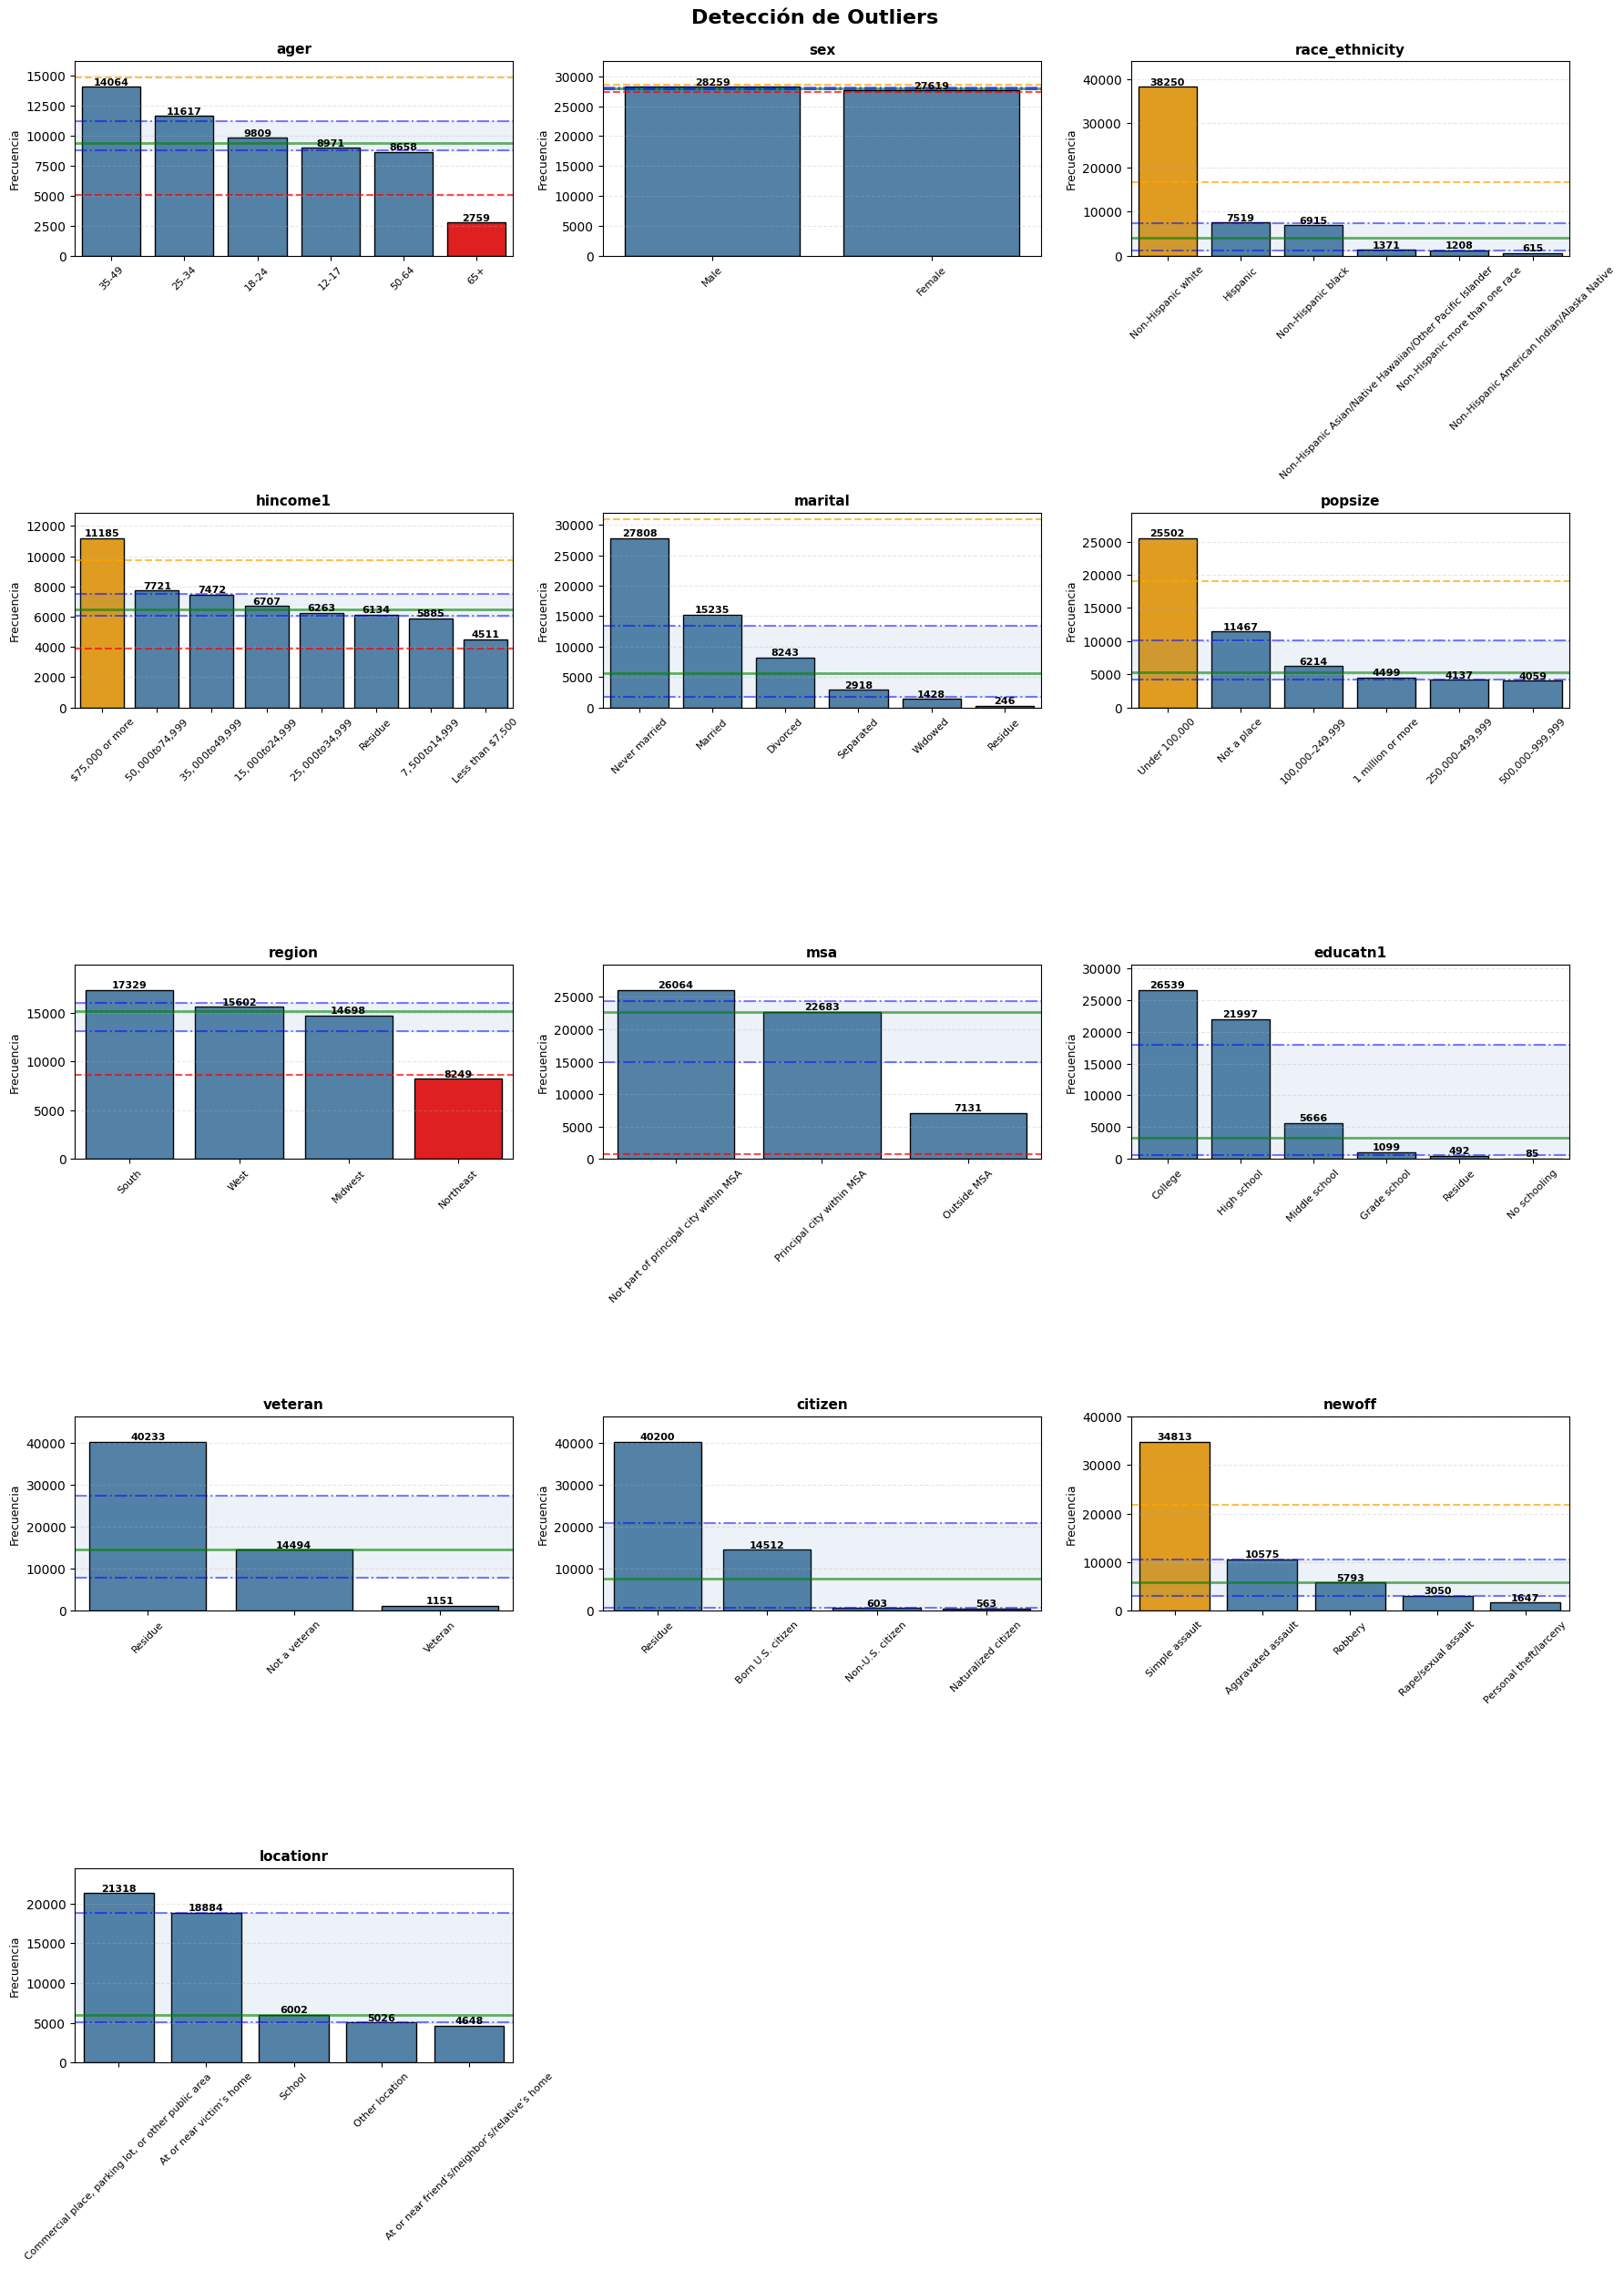

In [132]:

'''
    Analizamos las frecuencias de cada categoría.

    COLORES EN LAS BARRAS:
    - ROJO: Outliers inferiores (categorías con frecuencia anormalmente baja)
    - AZUL: Valores normales (categorías con frecuencia dentro del rango esperado)
    - NARANJA: Outliers superiores (categorías con frecuencia anormalmente alta)

    LÍNEAS DE REFERENCIA:
    - Línea verde sólida (━━━): Q2 (Mediana) - valor central de las frecuencias
    - Líneas azules punto-raya (─ ─): Q1 (percentil 25) y Q3 (percentil 75)
    - Línea roja discontinua (- - -): outlier inferior
    - Línea naranja discontinua (- - -): outlier superior
    - Zona azul clara sombreada: zona normal entre Q1 y Q3

    NÚMEROS SOBRE LAS BARRAS:
    - Muestran el número de casos de cada categoría
'''

df = personal_Victimization_Original.copy()
columnas = df.columns

# Calcular número de filas y columnas para el subplot
n_cols = 3
n_rows = int(np.ceil(len(columnas) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
fig.suptitle('Detección de Outliers',
             fontsize=16, fontweight='bold', y=0.995)

if n_rows == 1:
    axes = axes.reshape(1, -1)
axes_flat = axes.flatten()

# Almacenar estadísticas para el resumen
iqr_stats = {}

for idx, columna in enumerate(columnas):
    ax = axes_flat[idx]

    value_counts = df[columna].value_counts()
    frequencies = value_counts.values

    # Calcular cuartiles de las frecuencias (método IQR)
    Q1 = np.percentile(frequencies, 25)  # 25% de las frecuencias están por debajo
    Q2 = np.percentile(frequencies, 50)  # Mediana (50% por debajo)
    Q3 = np.percentile(frequencies, 75)  # 75% de las frecuencias están por debajo
    IQR = Q3 - Q1  # Rango intercuartílico (distancia entre Q1 y Q3)

    # Límites para detección de outliers usando regla de 1.5×IQR (estándar de Tukey)
    lower_bound = max(0, Q1 - 1.5 * IQR)  # Límite inferior (asegurar no negativo)
    upper_bound = Q3 + 1.5 * IQR  # Límite superior

    # Guardar estadísticas para análisis posterior
    iqr_stats[columna] = {
        'Q1': Q1, 'Q2': Q2, 'Q3': Q3, 'IQR': IQR,
        'lower_bound': lower_bound, 'upper_bound': upper_bound
    }

    # Clasificar cada categoría según su frecuencia respecto a los límites IQR
    def get_color_iqr(count):
        if count < lower_bound:
            return 'red'  # Outlier inferior: frecuencia anormalmente baja
        elif count > upper_bound:
            return 'orange'  # Outlier superior: frecuencia anormalmente alta (dominante)
        else:
            return 'steelblue'  # Normal: frecuencia dentro del rango esperado

    # Crear diccionario de colores para cada categoría
    color_map = {category: get_color_iqr(count)
                 for category, count in value_counts.items()}

    # Crear countplot con colores personalizados según clasificación IQR
    sns.countplot(data=df, x=columna,
                  order=value_counts.index,
                  hue=columna,
                  palette=color_map,
                  edgecolor='black',
                  ax=ax,
                  legend=False)

    # Añadir etiquetas con el número de casos sobre cada barra
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}',
                       ha='center', va='bottom', fontsize=8, fontweight='bold')

    # Dibujar líneas de referencia de los cuartiles y límites
    ax.axhline(y=Q2, color='green', linestyle='-',
               linewidth=2, alpha=0.6, label=f'Q2 (Mediana)')
    ax.axhline(y=Q1, color='blue', linestyle='-.',
               linewidth=1.5, alpha=0.5, label=f'Q1')
    ax.axhline(y=Q3, color='blue', linestyle='-.',
               linewidth=1.5, alpha=0.5, label=f'Q3')

    # Solo dibujar límite inferior si es mayor que 0
    if lower_bound > 0:
        ax.axhline(y=lower_bound, color='red', linestyle='--',
                   linewidth=1.5, alpha=0.7, label=f'Límite inferior')

    # Dibujar límite superior
    ax.axhline(y=upper_bound, color='orange', linestyle='--',
               linewidth=1.5, alpha=0.7, label=f'Límite superior')

    # Sombrear la zona IQR (rango normal entre Q1 y Q3)
    ax.axhspan(Q1, Q3, alpha=0.1, color='steelblue', label='Rango IQR')

    # Ajustar límites del eje Y para que empiece en 0 y tenga espacio arriba
    y_max = max(frequencies) * 1.15  # 15% más que el máximo para las etiquetas
    ax.set_ylim(0, y_max)

    # Configurar título y etiquetas
    ax.set_title(f'{columna}', fontweight='bold', fontsize=11)
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia', fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

# Ocultar subplots vacíos (si el número de variables no es múltiplo de n_cols)
for idx in range(len(columnas), len(axes_flat)):
    axes_flat[idx].set_visible(False)

plt.tight_layout()
plt.show()

<h3>Conclusión del análisis de detección de outliers categóricos</h3>

Se observa que varias variables presentan categorías con desbalances, lo cual es común en datos sociodemográficos y no representa errores, sino tendencias reales de la población:

- Outliers superiores (naranja):  
  Corresponden a categorías con una frecuencia significativamente mayor al resto, como:
  - 'race_ethnicity': predominio de *Non-Hispanic white*.  
  - 'msa': mayoría *Principal city within MSA* (zonas metropolitanas).  
  - 'newoff': fuerte presencia del tipo de crimen *Simple assault*.  
  - 'sex': clara dominancia de uno de los géneros según la muestra.  
  Estas categorías reflejan patrones estructurales de la población y no deben eliminarse, ya que contienen información esencial para el modelo.

- Outliers inferiores (rojo):
  Representan categorías con muy pocos registros, como:
  - Minorías étnicas (*Asian*, *American Indian*),  
  - Estados civiles menos comunes (*Separated*, *Widowed*),  
  - Regiones con baja representación (*Northeast*),  
  - Casos particulares en 'veteran' y 'citizen' (*Not a citizen*, *Veteran*).  
  Aunque su frecuencia es baja, estos valores no se consideran erróneos, sino casos válidos pero minoritarios que pueden generar desbalance de clases en el entrenamiento de modelos.

En conclusión, este análisis confirma que el dataset presenta desbalances demográficos y del tipo de crimen, pero sin errores o registros atípicos que deban eliminarse. Los outliers detectados aportan información valiosa sobre el fenómeno de victimización y deben conservarse para mantener la representatividad del modelo predictivo.


<h3>Análisis de sesgos o distribuciones</h3>

Este grafico muestra la distribución de cada variable comparado con 'newoff'

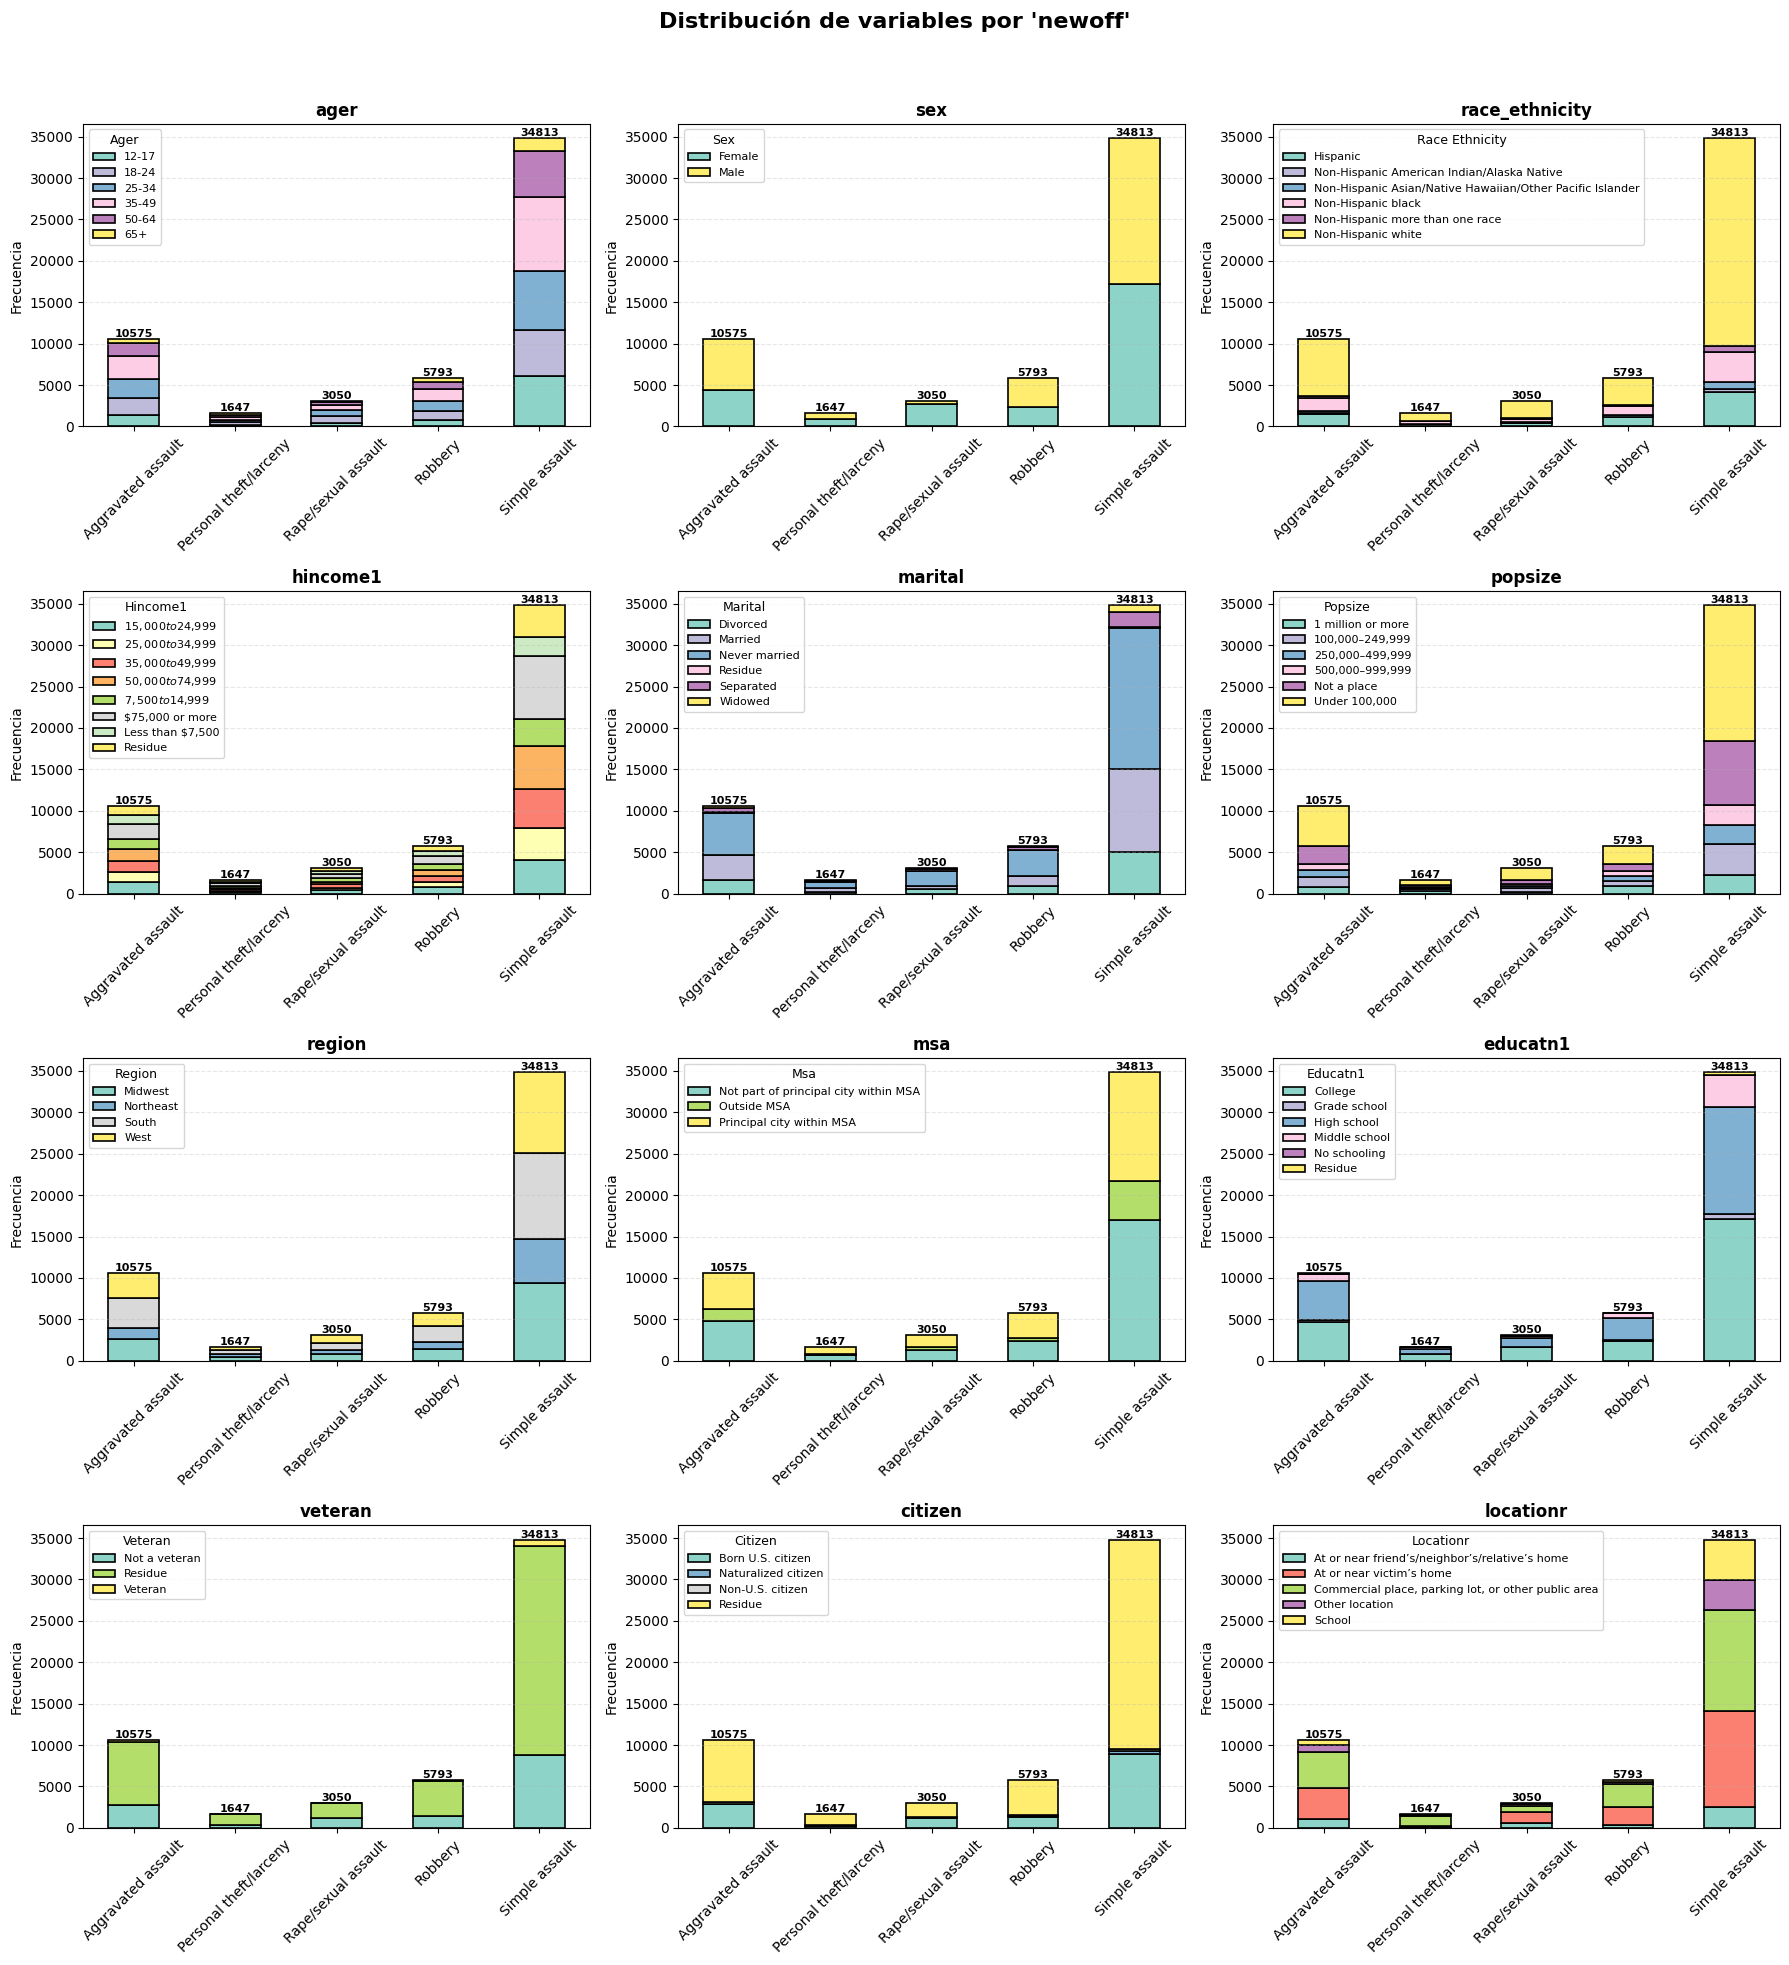

In [134]:

# Variable base
var1 = 'newoff'

# Seleccionar columnas a comparar (todas excepto var1)
cols = [c for c in personal_Victimization_Original.columns if c != var1]

# Definir tamaño de cuadrícula (automático)
cols_per_row = 3
n_rows = int(np.ceil(len(cols) / cols_per_row))
# Crear figura grande
fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(6 * cols_per_row, 5 * n_rows))
axes = axes.flatten()  # para indexar fácilmente

for i, var2 in enumerate(cols):
    ax = axes[i]

    # Crear tabla cruzada
    crosstab = pd.crosstab(personal_Victimization_Original[var1],
                           personal_Victimization_Original[var2])

    # Si no hay datos válidos, ocultar gráfico
    if crosstab.empty:
        ax.set_visible(False)
        continue

    # Graficar en el eje correspondiente
    crosstab.plot(kind='bar', stacked=True, colormap='Set3',
                  edgecolor='black', linewidth=1.2, ax=ax, legend=True)

    # Mover la leyenda dentro del gráfico (ajustable)
    ax.legend(title=var2.replace('_', ' ').title(),
              loc='upper left', fontsize=8, title_fontsize=9,
              frameon=True, shadow=False)

    # Añadir totales encima de cada barra
    totals = crosstab.sum(axis=1)
    for j, total in enumerate(totals):
        ax.text(j, total, f'{int(total)}', ha='center', va='bottom',
                fontsize=8, fontweight='bold')

    # Estética
    ax.set_title(f'{var2}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.tick_params(axis='x', rotation=45)

# Quitar ejes vacíos si sobran
for ax in axes[len(cols):]:
    ax.set_visible(False)

# Quitar la leyenda general (cada subplot ya tiene la suya)
plt.suptitle(f"Distribución de variables por '{var1}'", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<h3>Conclusión del análisis de distribución de variables categóricas</h3>

El análisis de la distribución muestra un fuerte desbalance de clases, con una concentración muy alta de casos en Simple assault y una representación mucho menor en Aggravated assault, Robbery y Personal theft/larceny. 

En cuanto a las variables predictoras, se observan patrones relevantes en edad (ager), sexo (sex), estado civil (marital), nivel educativo (educatn1), ingresos (hincome1) y lugar del incidente (locationr), las cuales muestran diferencias claras entre tipos de delito y deben mantenerse. 

Variables como region, msa y popsize también pueden conservarse, aunque conviene agrupar categorías poco frecuentes para mejorar la generalización. 

Por el contrario, veteran y citizen presentan muy baja variabilidad y escaso aporte informativo, por lo que podrían eliminarse sin afectar el rendimiento del modelo. 

<h3>Guardado de datos</h3>

Ahora que hemos analizado todos los datos que consideramos utiles a la hora de realizar el modelo, vamos a guardar en un csv el dataframe para pasar al preprosesamiento de los datos.

In [ ]:
personal_Victimization_Original.to_csv("../../data/personal_victimization_mapped.csv", index=False)